## RNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + noise
    return series[..., np.newaxis].astype(np.float32)

In [2]:
generate_time_series(3, 10).shape

(3, 10, 1)

In [3]:
generate_time_series(3, 10)

array([[[-0.5116528 ],
        [ 0.36110646],
        [ 0.2259081 ],
        [-0.22087191],
        [-0.39460936],
        [ 0.71158606],
        [-0.21449949],
        [-0.29964674],
        [ 0.06630538],
        [ 0.42075822]],

       [[ 0.5278261 ],
        [-0.58856666],
        [-0.05922228],
        [ 0.37269202],
        [ 0.08698143],
        [-0.4548745 ],
        [-0.11513216],
        [ 0.6959437 ],
        [-0.38774648],
        [-0.24695887]],

       [[ 0.5562431 ],
        [-0.16123354],
        [-0.39904395],
        [ 0.5846377 ],
        [-0.19034922],
        [-0.37684095],
        [ 0.44504613],
        [-0.12501504],
        [-0.2982106 ],
        [ 0.34028423]]], dtype=float32)

In [4]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]


In [5]:
X_train.shape

(7000, 50, 1)

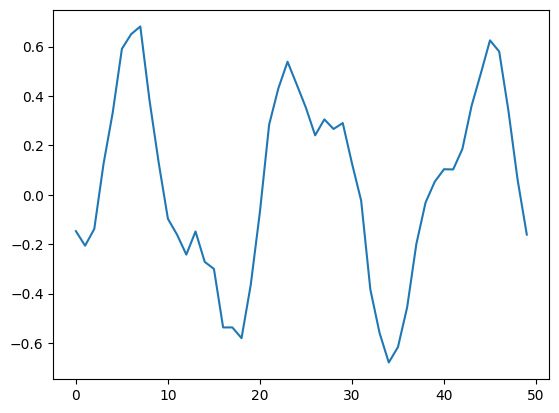

In [6]:
plt.plot(X_train[4])

# baseline to evaluate a RNN

In [7]:
y_pred = X_valid[:, -1]
print(y_pred)
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

[[-0.28473374]
 [-0.3577082 ]
 [-0.4347753 ]
 ...
 [ 0.44494247]
 [ 0.18370599]
 [-0.24688563]]


0.02022823

# compare against a fully connected net

In [8]:
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[50, 1]),
        keras.layers.Dense(1)
])


model.compile(loss="mse", optimizer="adam")

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

print(f"MSE on test set: {mse_test:.3f}")


Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1733 - val_loss: 0.0632
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0411 - val_loss: 0.0253
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0202 - val_loss: 0.0156
Epoch 4/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0139 - val_loss: 0.0120
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.0102
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0082
Epoch 8/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0078 - val_loss: 0.0076
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0068
Epoch 10/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0063

# A simple RNN

It contains a single layer, with a single neuron. We do not need to specify the length of the input sequences (unlike in the previous fully connected model), since a recurrent neural network can process any number of time steps (this is why we set the first input dimension to None).

In [9]:
model = keras.models.Sequential([
      keras.layers.SimpleRNN(1, activation='tanh', return_sequences=False, input_shape=[None, 1])
])

model.compile(loss="mse", optimizer="adam")

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

print(f"MSE on test set: {mse_test:.3f}")

Epoch 1/20
219/219 [==============================] - 3s 10ms/step - loss: 0.3934 - val_loss: 0.3667
Epoch 2/20
219/219 [==============================] - 4s 19ms/step - loss: 0.3451 - val_loss: 0.3215
Epoch 3/20
219/219 [==============================] - 2s 11ms/step - loss: 0.3005 - val_loss: 0.2786
Epoch 4/20
219/219 [==============================] - 2s 8ms/step - loss: 0.2590 - val_loss: 0.2389
Epoch 5/20
219/219 [==============================] - 2s 9ms/step - loss: 0.2210 - val_loss: 0.2032
Epoch 6/20
219/219 [==============================] - 2s 9ms/step - loss: 0.1876 - val_loss: 0.1729
Epoch 7/20
219/219 [==============================] - 2s 11ms/step - loss: 0.1602 - val_loss: 0.1487
Epoch 8/20
219/219 [==============================] - 2s 11ms/step - loss: 0.1386 - val_loss: 0.1293
Epoch 9/20
219/219 [==============================] - 2s 9ms/step - loss: 0.1213 - val_loss: 0.1135
Epoch 10/20
219/219 [==============================] - 2s 9ms/step - loss: 0.1047 - val_loss: 0

# Deep RNN

In [10]:
model = keras.models.Sequential([
        keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        keras.layers.SimpleRNN(20, return_sequences=True),
        keras.layers.SimpleRNN(1) # return_sequence=False (univariate time series)
])
model.summary()

model.compile(loss="mse", optimizer="adam")

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

print(f"MSE on test set: {mse_test:.3f}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1)                 22        
                                                                 
Total params: 1282 (5.01 KB)
Trainable params: 1282 (5.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
219/219 [==============================] - 11s 39ms/step - loss: 0.0171 - val_loss: 0.0045
Epoch 2/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 3/20
219/219 [==============================] - 9s 40ms/step - loss: 0.0037 -

## If we want to use activations other than tanh then use a dense layer at the end

In [11]:
model = keras.models.Sequential([
        keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        keras.layers.SimpleRNN(20, return_sequences=False),
        keras.layers.Dense(1) # dense layer
])
model.summary()

model.compile(loss="mse", optimizer="adam")

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

print(f"MSE on test set: {mse_test:.3f}")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
219/219 [==============================] - 8s 23ms/step - loss: 0.0589 - val_loss: 0.0108
Epoch 2/20
219/219 [==============================] - 5s 25ms/step - loss: 0.0071 - val_loss: 0.0054
Epoch 3/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0045 - 

# Previous models predicted only the next time step

We want to predict multiple timesteps in the future

#### we can circulate back our immediate prediction

In [12]:
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
        y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
        X = np.concatenate([X, y_pred_one], axis=1)
Y_pred = X[:, n_steps:]
print(Y_pred)

1/1 [==============================] - 0s 41ms/step
[[[0.08078158]
  [0.18092689]
  [0.21588717]
  [0.20431425]
  [0.20281403]
  [0.23552386]
  [0.26965296]
  [0.35185662]
  [0.42204493]
  [0.47227827]]]


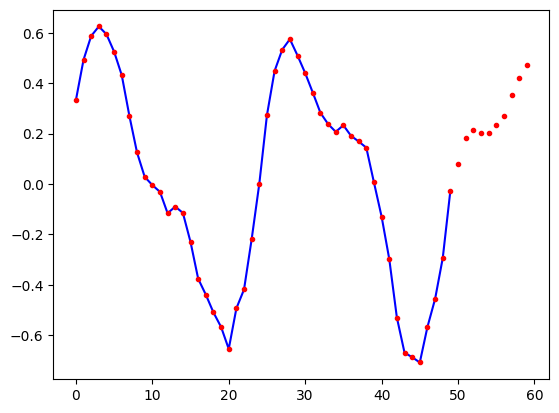

In [13]:
plt.plot(X_new[0],'b')
plt.plot(X[0],'r.')

# Using LSTM


In [14]:

model = keras.models.Sequential([
        keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
        keras.layers.LSTM(20, return_sequences=False),
        keras.layers.Dense(1) # dense layer
])
model.summary()

model.compile(loss="mse", optimizer="adam")

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

print(f"MSE on test set: {mse_test:.3f}")


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 20)          1760      
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5061 (19.77 KB)
Trainable params: 5061 (19.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
219/219 [==============================] - 14s 46ms/step - loss: 0.0517 - val_loss: 0.0228
Epoch 2/20
219/219 [==============================] - 9s 42ms/step - loss: 0.0182 - val_loss: 0.0139
Epoch 3/20
219/219 [==============================] - 8s 38ms/step - loss: 0.0112

In [15]:
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
        y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
        X = np.concatenate([X, y_pred_one], axis=1)
Y_pred = X[:, n_steps:]
print(Y_pred)

1/1 [==============================] - 0s 26ms/step
[[[-0.16546936]
  [-0.2838779 ]
  [-0.35905588]
  [-0.40081728]
  [-0.42297474]
  [-0.43374503]
  [-0.43346035]
  [-0.41644618]
  [-0.37696236]
  [-0.31542304]]]


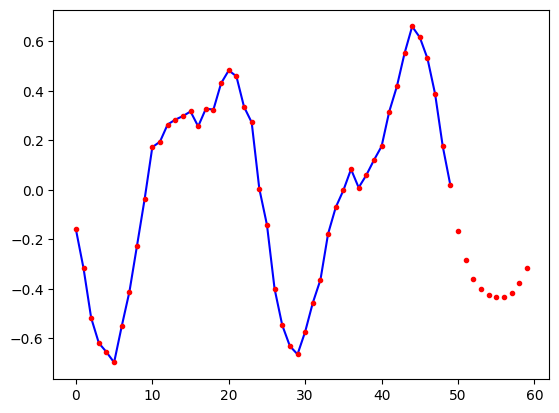

In [16]:
plt.plot(X_new[0],'b')
plt.plot(X[0],'r.')

# Denoising convolutional autoencoder



In [17]:
import tensorflow as tf

# Define a 2x2 input tensor with no channel dimension
input_tensor = tf.constant([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]]
], dtype=tf.float32)

# Add a channel dimension to the input tensor
input_tensor = tf.expand_dims(input_tensor, axis=-1)
print(input_tensor.shape)

# Define an UpSampling2D layer with size 2
upsample = tf.keras.layers.UpSampling2D(size=2)

# Apply the layer to the input tensor
output_tensor = upsample(input_tensor)

# Output tensor shape: (2, 4, 4, 1)
print(output_tensor.shape)


(2, 2, 2, 1)
(2, 4, 4, 1)


In [18]:
print(input_tensor)

tf.Tensor(
[[[[1.]
   [2.]]

  [[3.]
   [4.]]]


 [[[5.]
   [6.]]

  [[7.]
   [8.]]]], shape=(2, 2, 2, 1), dtype=float32)


In [19]:
print(output_tensor)

tf.Tensor(
[[[[1.]
   [1.]
   [2.]
   [2.]]

  [[1.]
   [1.]
   [2.]
   [2.]]

  [[3.]
   [3.]
   [4.]
   [4.]]

  [[3.]
   [3.]
   [4.]
   [4.]]]


 [[[5.]
   [5.]
   [6.]
   [6.]]

  [[5.]
   [5.]
   [6.]
   [6.]]

  [[7.]
   [7.]
   [8.]
   [8.]]

  [[7.]
   [7.]
   [8.]
   [8.]]]], shape=(2, 4, 4, 1), dtype=float32)


# Convolutional Autoencoder

In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


(x_train, _), (x_test, _) = mnist.load_data()


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Adding noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.) # clipped between 0 and 1 to ensure valid pixel intensity range.
x_test_noisy = np.clip(x_test_noisy, 0., 1.) # clipped between 0 and 1 to ensure valid pixel intensity range.

11490434/11490434 [==============================] - 0s 0us/step


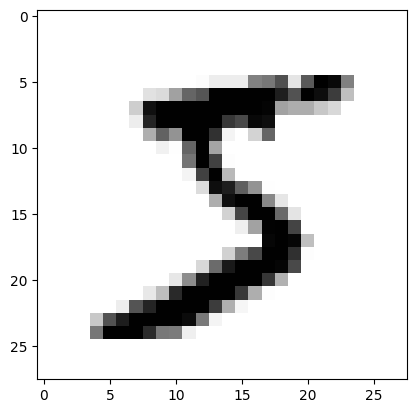

In [2]:
plt.imshow(x_train[0], cmap='gray_r')

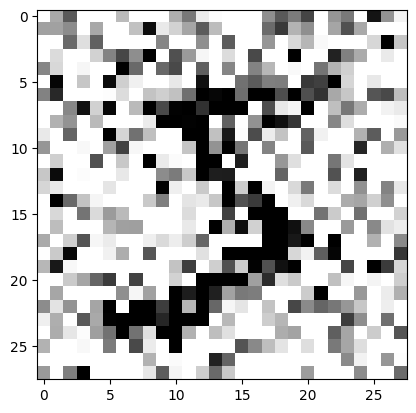

In [3]:
plt.imshow(x_train_noisy[0], cmap='gray_r')

In [4]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

denoised_image = autoencoder.predict(np.array([x_test_noisy[0]]))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248  

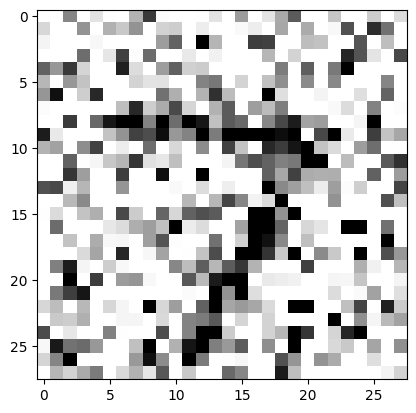

In [5]:
plt.imshow(x_test_noisy[0], cmap='gray_r')

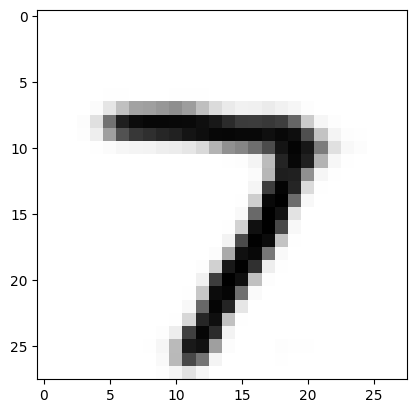

In [6]:
plt.imshow(denoised_image[0], cmap='gray_r')